In [2]:
import numpy as np
import pandas as pd 
import  matplotlib.pyplot as plt
from math import sqrt 
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
movies_df = pd.read_csv(r"Downloads\moviedataset\ml-latest\movies.csv")
ratings_df = pd.read_csv(r"Downloads\moviedataset\ml-latest\ratings.csv")

In [4]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
34203,151697,Grand Slam (1967),Thriller
34204,151701,Bloodmoney (2010),(no genres listed)
34205,151703,The Butterfly Circus (2009),Drama
34206,151709,Zero (2015),Drama|Sci-Fi


In [5]:
ratings_df = ratings_df.drop("timestamp",1)
movies_data = movies_df.drop('title',1)

In [6]:
list = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror', 'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

for i in list :
    movies_data[i] = 0
    movies_data.loc[movies_data['genres'].str.contains(i), i] = 1

In [7]:
movies_data = movies_data.drop(['genres','movieId'],1)

40923.293356717106
33391.7255290473
29054.076886289087
27167.43621775208
24717.59406536393
23209.334563354874
22332.720715630898
20914.79343862888
19504.108314833036
18458.009201358294
18252.555070034443
16831.024350670017
16750.476185812513
15564.460358354123


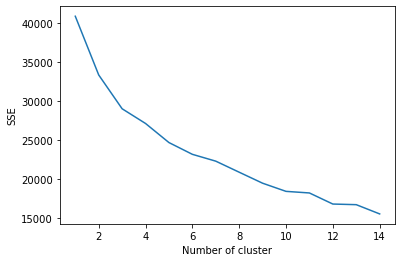

In [15]:
sse = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, max_iter = 500).fit(movies_data)
    movies_df['cluster'] = kmeans.labels_
    sse.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.figure()
plt.plot(range(1,15), sse)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [24]:
#choose k = 9
kmeans = KMeans(n_clusters = 9, max_iter = 500).fit(movies_data)
movies_df['cluster'] = kmeans.labels_
movies_df.drop('genres',1)

,movieId,title,cluster
0,1,Toy Story (1995),3
1,2,Jumanji (1995),3
2,3,Grumpier Old Men (1995),4
3,4,Waiting to Exhale (1995),5
4,5,Father of the Bride Part II (1995),4
...,...,...,...
34203,151697,Grand Slam (1967),0
34204,151701,Bloodmoney (2010),0
34205,151703,The Butterfly Circus (2009),2
34206,151709,Zero (2015),2


In [25]:
def getUserInfo(UserId):
    user_df = ratings_df[ratings_df['userId'] == UserId]
    res = pd.merge(user_df,movies_df,how = 'inner', on = "movieId")
    return res

In [26]:
def getUserFilmCluster(user_df):
    res = -1;
    cluster = -1;
    if not user_df.empty:
        for i in range(0,9):
            if not user_df[user_df['cluster'] == i].empty:
                tmp = user_df[user_df['cluster'] == i].rating.mean()
                if(tmp > res and tmp >=4.5 ) :
                    res = tmp
                    cluster = i
    return cluster

In [27]:
def getFilm(cluster_film):
    if cluster_film != -1 :
        print("Phim liên quan:")
        tmp = movies_df[movies_df['cluster'] == cluster_film]
        sizee = tmp.shape[0]
        indexx = np.random.randint(0,sizee,size = 20)
        for i in range(0,20):
            print(tmp.at[tmp.index[indexx[i]],'title'])
    else : 
        print("Phim có thể bạn sẽ thích:")
        sizee = movies_df.shape[0]
        indexx = np.random.randint(0, sizee ,size = 30)
        for i in range(0,30):
            print(movies_df.at[movies_df.index[indexx[i]],'title'])


In [28]:
def run(user_id):
    info = getUserInfo(user_id)
    cls = getUserFilmCluster(info)
    print(cls)
    getFilm(cls)
    
    
    
    

In [29]:
run(2)

2
Phim liên quan:
Ashes, The (Popioly) (1965)
Lifted (2010)
Skhizein (2008)
Stranger, The (Straniero, Lo) (1967)
Old Yeller (1957)
Castle of Purity (El castillo de la pureza) (1973)
Katie Tippel (Keetje Tippel) (1975)
Man, Woman and Beast (L'uomo la donna e la bestia) (1977)
Return (2011)
My Only Sunshine (2009)
And When Did You Last See Your Father? (2007)
Fire with Fire (2012)
See How They Fall (Regarde les hommes tomber) (1994)
Delicate Balance, A (1973)
Jade Warrior (Jadesoturi) (2006)
Our Little Differences (Die feinen Unterschiede) (2012)
Among Wolves (Entrelobos) (2010)
Executioners from Shaolin (1977)
Xingu (2012) 
The Liberator (2013)


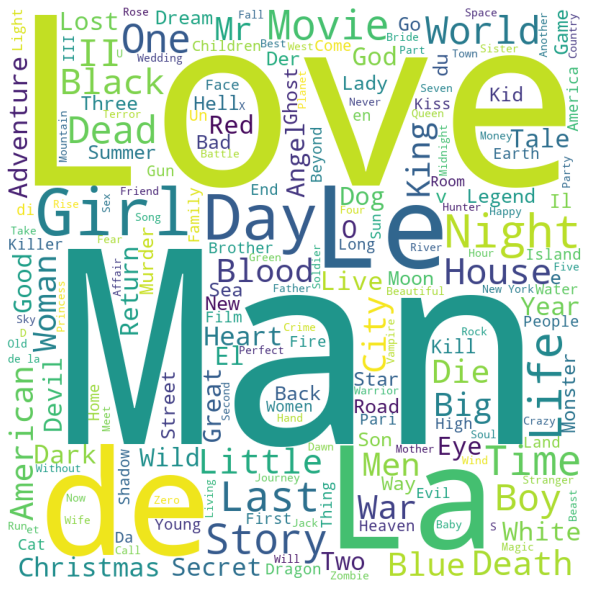

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
#                 stopwords = stopwords, 
                min_font_size = 10).generate(" ".join(movies_df["title"])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
aplt.tight_layout(pad = 0) t
  
plt.savefig("longbuku.png")

In [28]:
os.getcwd()

'C:\\Users\\Admin'